# Regression In TensorFlow with TensorBoard

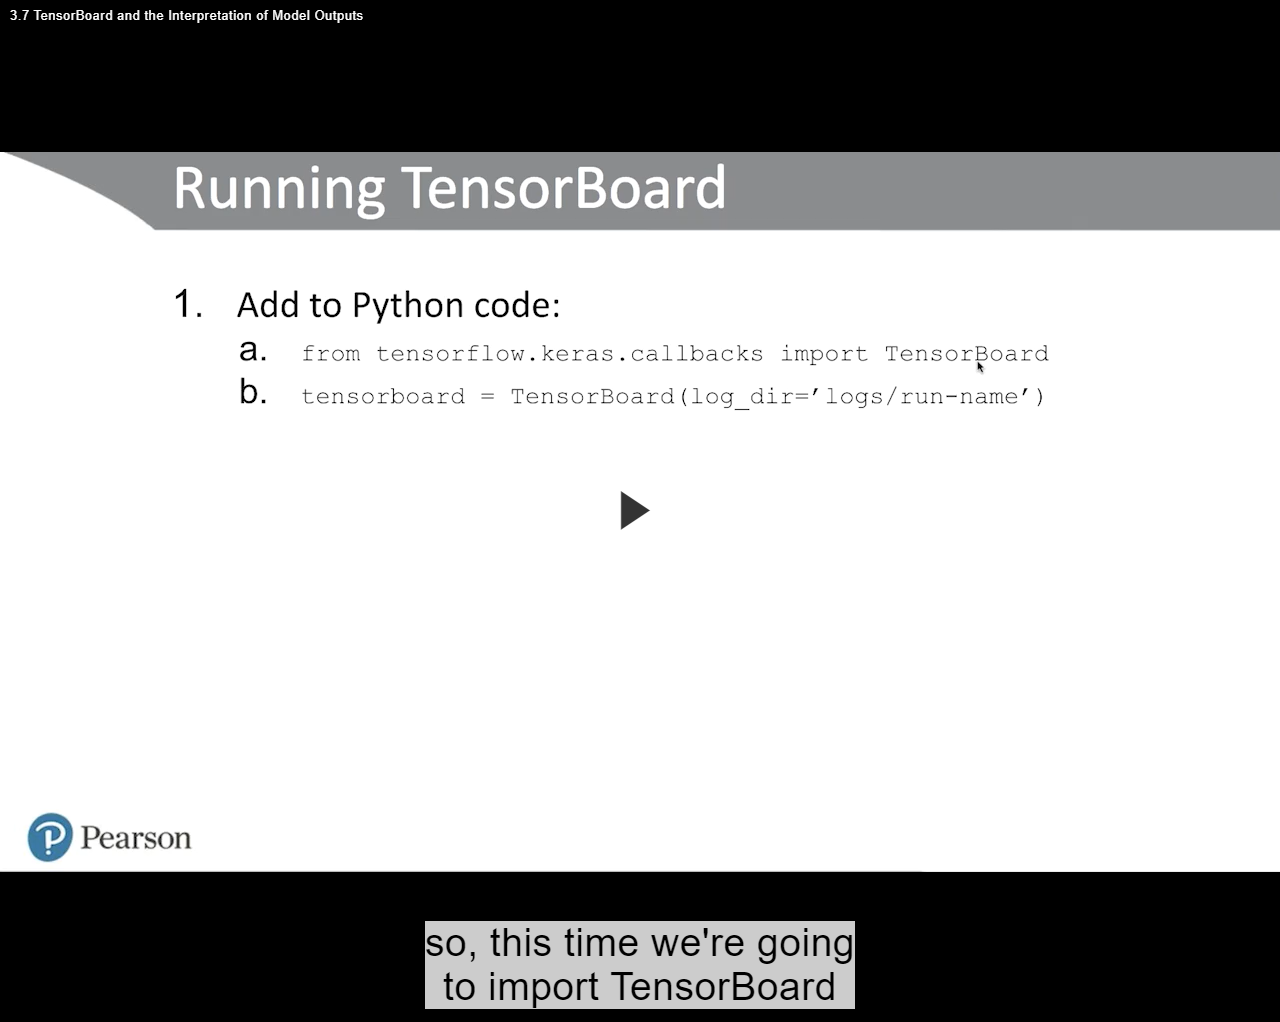

Load Dependencies


In [16]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import  TensorBoard # new
import os

Load Data


In [17]:
(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

In [18]:
X_train.shape

(404, 13)

In [19]:
X_valid.shape

(102, 13)

In [20]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [21]:
y_train[0]

15.2

## Design Neural Network Architecture

In [24]:
model = Sequential()

model.add(Dense(32, input_dim=13, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

# Configure Model

In [27]:
model.compile(loss= 'mean_squared_error', optimizer = 'adam')

In [28]:
output_dir = 'model_output/'

In [29]:
run_name = 'regression_baseline'
output_path = output_dir + run_name

In [30]:
if not os.path.exists(output_path):
  os.makedirs(output_path)

In [31]:
modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5',
                                  save_weights_only = True)

In [32]:
tensorboard = TensorBoard(log_dir='logs/' + run_name)

# Train

In [36]:
model.fit(X_train, y_train,
          batch_size=8, epochs=32, verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[modelcheckpoint, tensorboard]          )

Epoch 1/32
51/51 [==============================] - 0s 8ms/step - loss: 504.2349 - val_loss: 517.2435
Epoch 2/32
51/51 [==============================] - 0s 3ms/step - loss: 484.4112 - val_loss: 474.3719
Epoch 3/32
51/51 [==============================] - 0s 3ms/step - loss: 448.1281 - val_loss: 453.4718
Epoch 4/32
51/51 [==============================] - 0s 3ms/step - loss: 420.1042 - val_loss: 425.3773
Epoch 5/32
51/51 [==============================] - 0s 3ms/step - loss: 387.8039 - val_loss: 370.6693
Epoch 6/32
51/51 [==============================] - 0s 3ms/step - loss: 342.1586 - val_loss: 315.8842
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 297.9341 - val_loss: 288.5310
Epoch 8/32
51/51 [==============================] - 0s 3ms/step - loss: 264.5911 - val_loss: 269.5369
Epoch 9/32
51/51 [==============================] - 0s 3ms/step - loss: 224.5477 - val_loss: 283.1641
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 197.2311 

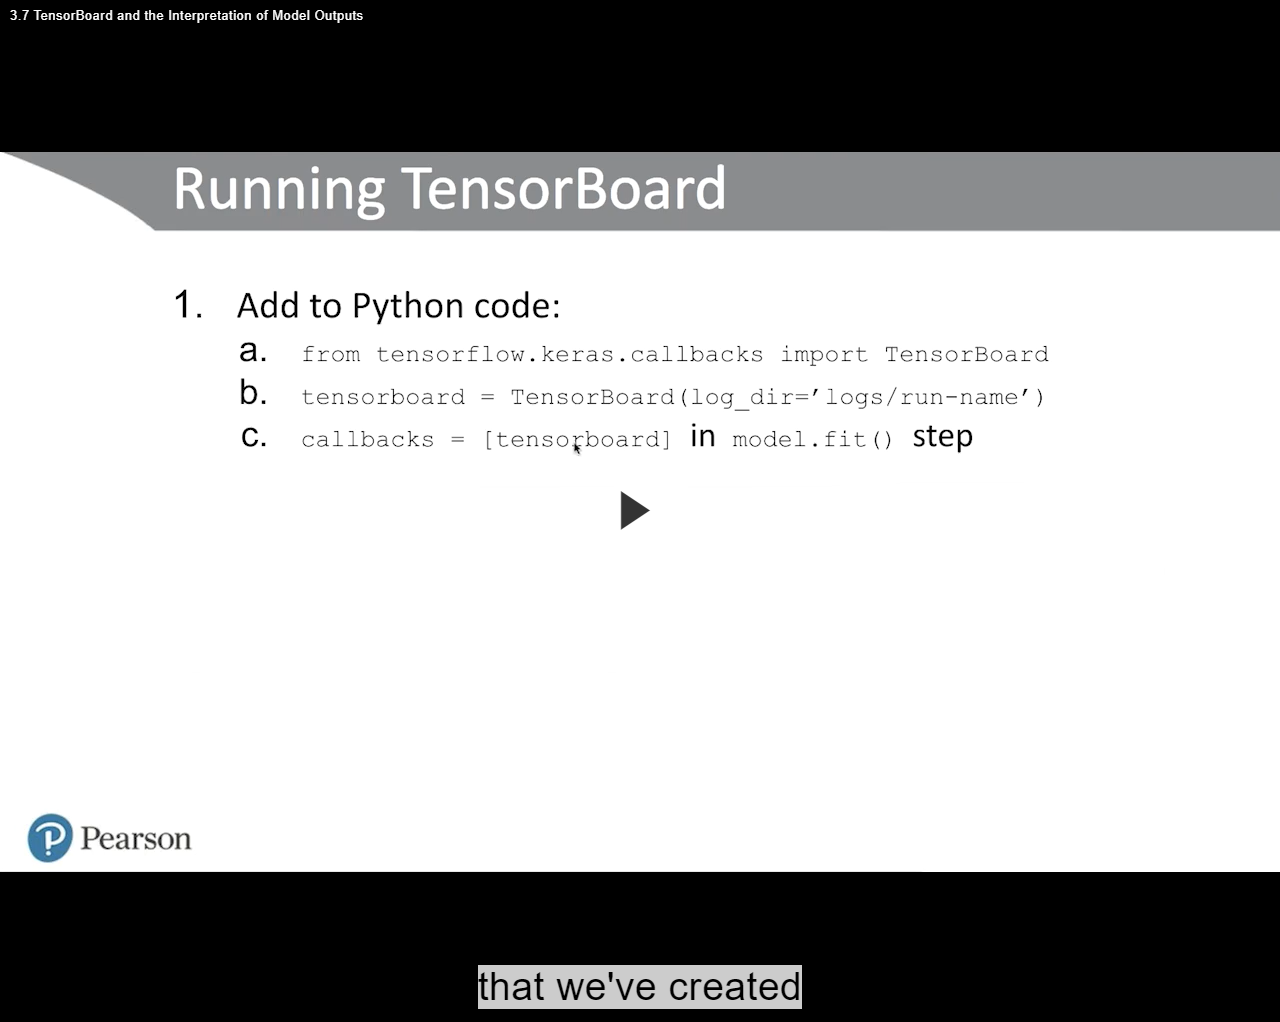

# Performance Inference

In [38]:
model.load_weights(output_path + '/weights.28.hdf5')

In [39]:
X_valid[42]

array([  9.32909,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.185  ,
        98.7    ,   2.2616 ,  24.     , 666.     ,  20.2    , 396.9    ,
        18.13   ])

In [41]:
y_valid[42]

14.1

In [44]:
model.predict(np.reshape(X_valid[42], [1,13]))

array([[14.961745]], dtype=float32)